In [243]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns

In [244]:
df = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx',sheet_name='Pemakaman')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df = df.iloc[:,:5]

In [245]:
df

,Tanggal,Pemakaman_COVID19_Harian,Total_Pemakaman_COVID19,Pemakaman_Umum_Harian,Total_Pemakaman_Umum
0,2020-03-01,0,0,150,150
1,2020-03-02,0,0,136,286
2,2020-03-03,0,0,135,421
3,2020-03-04,0,0,116,537
4,2020-03-05,0,0,124,661
5,2020-03-06,1,1,158,819
6,2020-03-07,0,1,144,963
7,2020-03-08,0,1,106,1069
8,2020-03-09,0,1,145,1214
9,2020-03-10,0,1,146,1360


In [246]:
df.describe()

,Pemakaman_COVID19_Harian,Total_Pemakaman_COVID19,Pemakaman_Umum_Harian,Total_Pemakaman_Umum
count,496.00000,496.000000,496.000000,496.000000
mean,48.87500,9229.203629,162.703629,38106.534274
std,50.50525,6725.020867,49.251354,23069.842197
min,0.00000,0.000000,96.000000,150.000000
25%,23.00000,3113.000000,138.000000,17635.750000
50%,38.00000,7903.500000,152.000000,37010.500000
75%,55.00000,16162.500000,172.000000,59267.750000
max,394.00000,24242.000000,464.000000,80701.000000


In [247]:
df.set_index(df['Tanggal'],inplace=True)

In [259]:
df_perbulan = df[['Pemakaman_COVID19_Harian','Pemakaman_Umum_Harian']].resample('M').sum()
df_perbulan = df_perbulan.rename(columns={'Pemakaman_COVID19_Harian':'Pemakaman Covid-19 Bulanan',
                                        'Pemakaman_Umum_Harian':'Pemakaman Umum Bulanan'})

In [260]:
df_perbulan

,Pemakaman Covid-19 Bulanan,Pemakaman Umum Bulanan
Tanggal,,
2020-03-31,354,4245
2020-04-30,1241,4612
2020-05-31,892,4455
2020-06-30,575,3975
2020-07-31,630,4221
2020-08-31,1183,4807
2020-09-30,1659,5492
2020-10-31,1261,4712
2020-11-30,1203,4698


In [261]:
df_perbulan['Tanggal'] = df_perbulan.index

Text(0, 0.5, 'Jumlah')

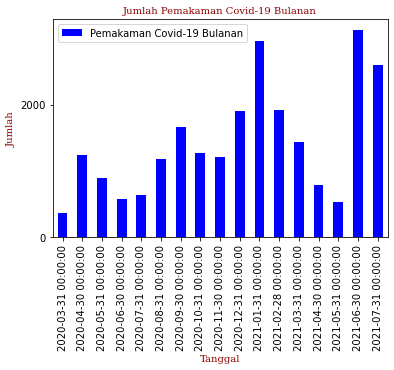

In [264]:
df_perbulan.plot.bar(x='Tanggal', y='Pemakaman Covid-19 Bulanan', color='blue',fontsize=10)
plt.legend(prop={'size': 10})
plt.title('Jumlah Pemakaman Covid-19 Bulanan',fontsize=10,fontdict=font)
plt.xlabel('Tanggal',size = 10,fontdict=font)
plt.ylabel('Jumlah',size = 10,fontdict=font)

Text(0, 0.5, 'Jumlah')

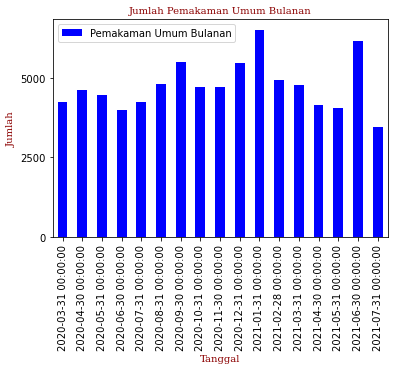

In [265]:
df_perbulan.plot.bar(x='Tanggal', y='Pemakaman Umum Bulanan', color='blue',fontsize=10)
plt.legend(prop={'size': 10})
plt.title('Jumlah Pemakaman Umum Bulanan',fontsize=10,fontdict=font)
plt.xlabel('Tanggal',size = 10,fontdict=font)
plt.ylabel('Jumlah',size = 10,fontdict=font)

In [266]:
df_perbulan

,Pemakaman Covid-19 Bulanan,Pemakaman Umum Bulanan,Tanggal
Tanggal,,,
2020-03-31,354,4245,2020-03-31
2020-04-30,1241,4612,2020-04-30
2020-05-31,892,4455,2020-05-31
2020-06-30,575,3975,2020-06-30
2020-07-31,630,4221,2020-07-31
2020-08-31,1183,4807,2020-08-31
2020-09-30,1659,5492,2020-09-30
2020-10-31,1261,4712,2020-10-31
2020-11-30,1203,4698,2020-11-30


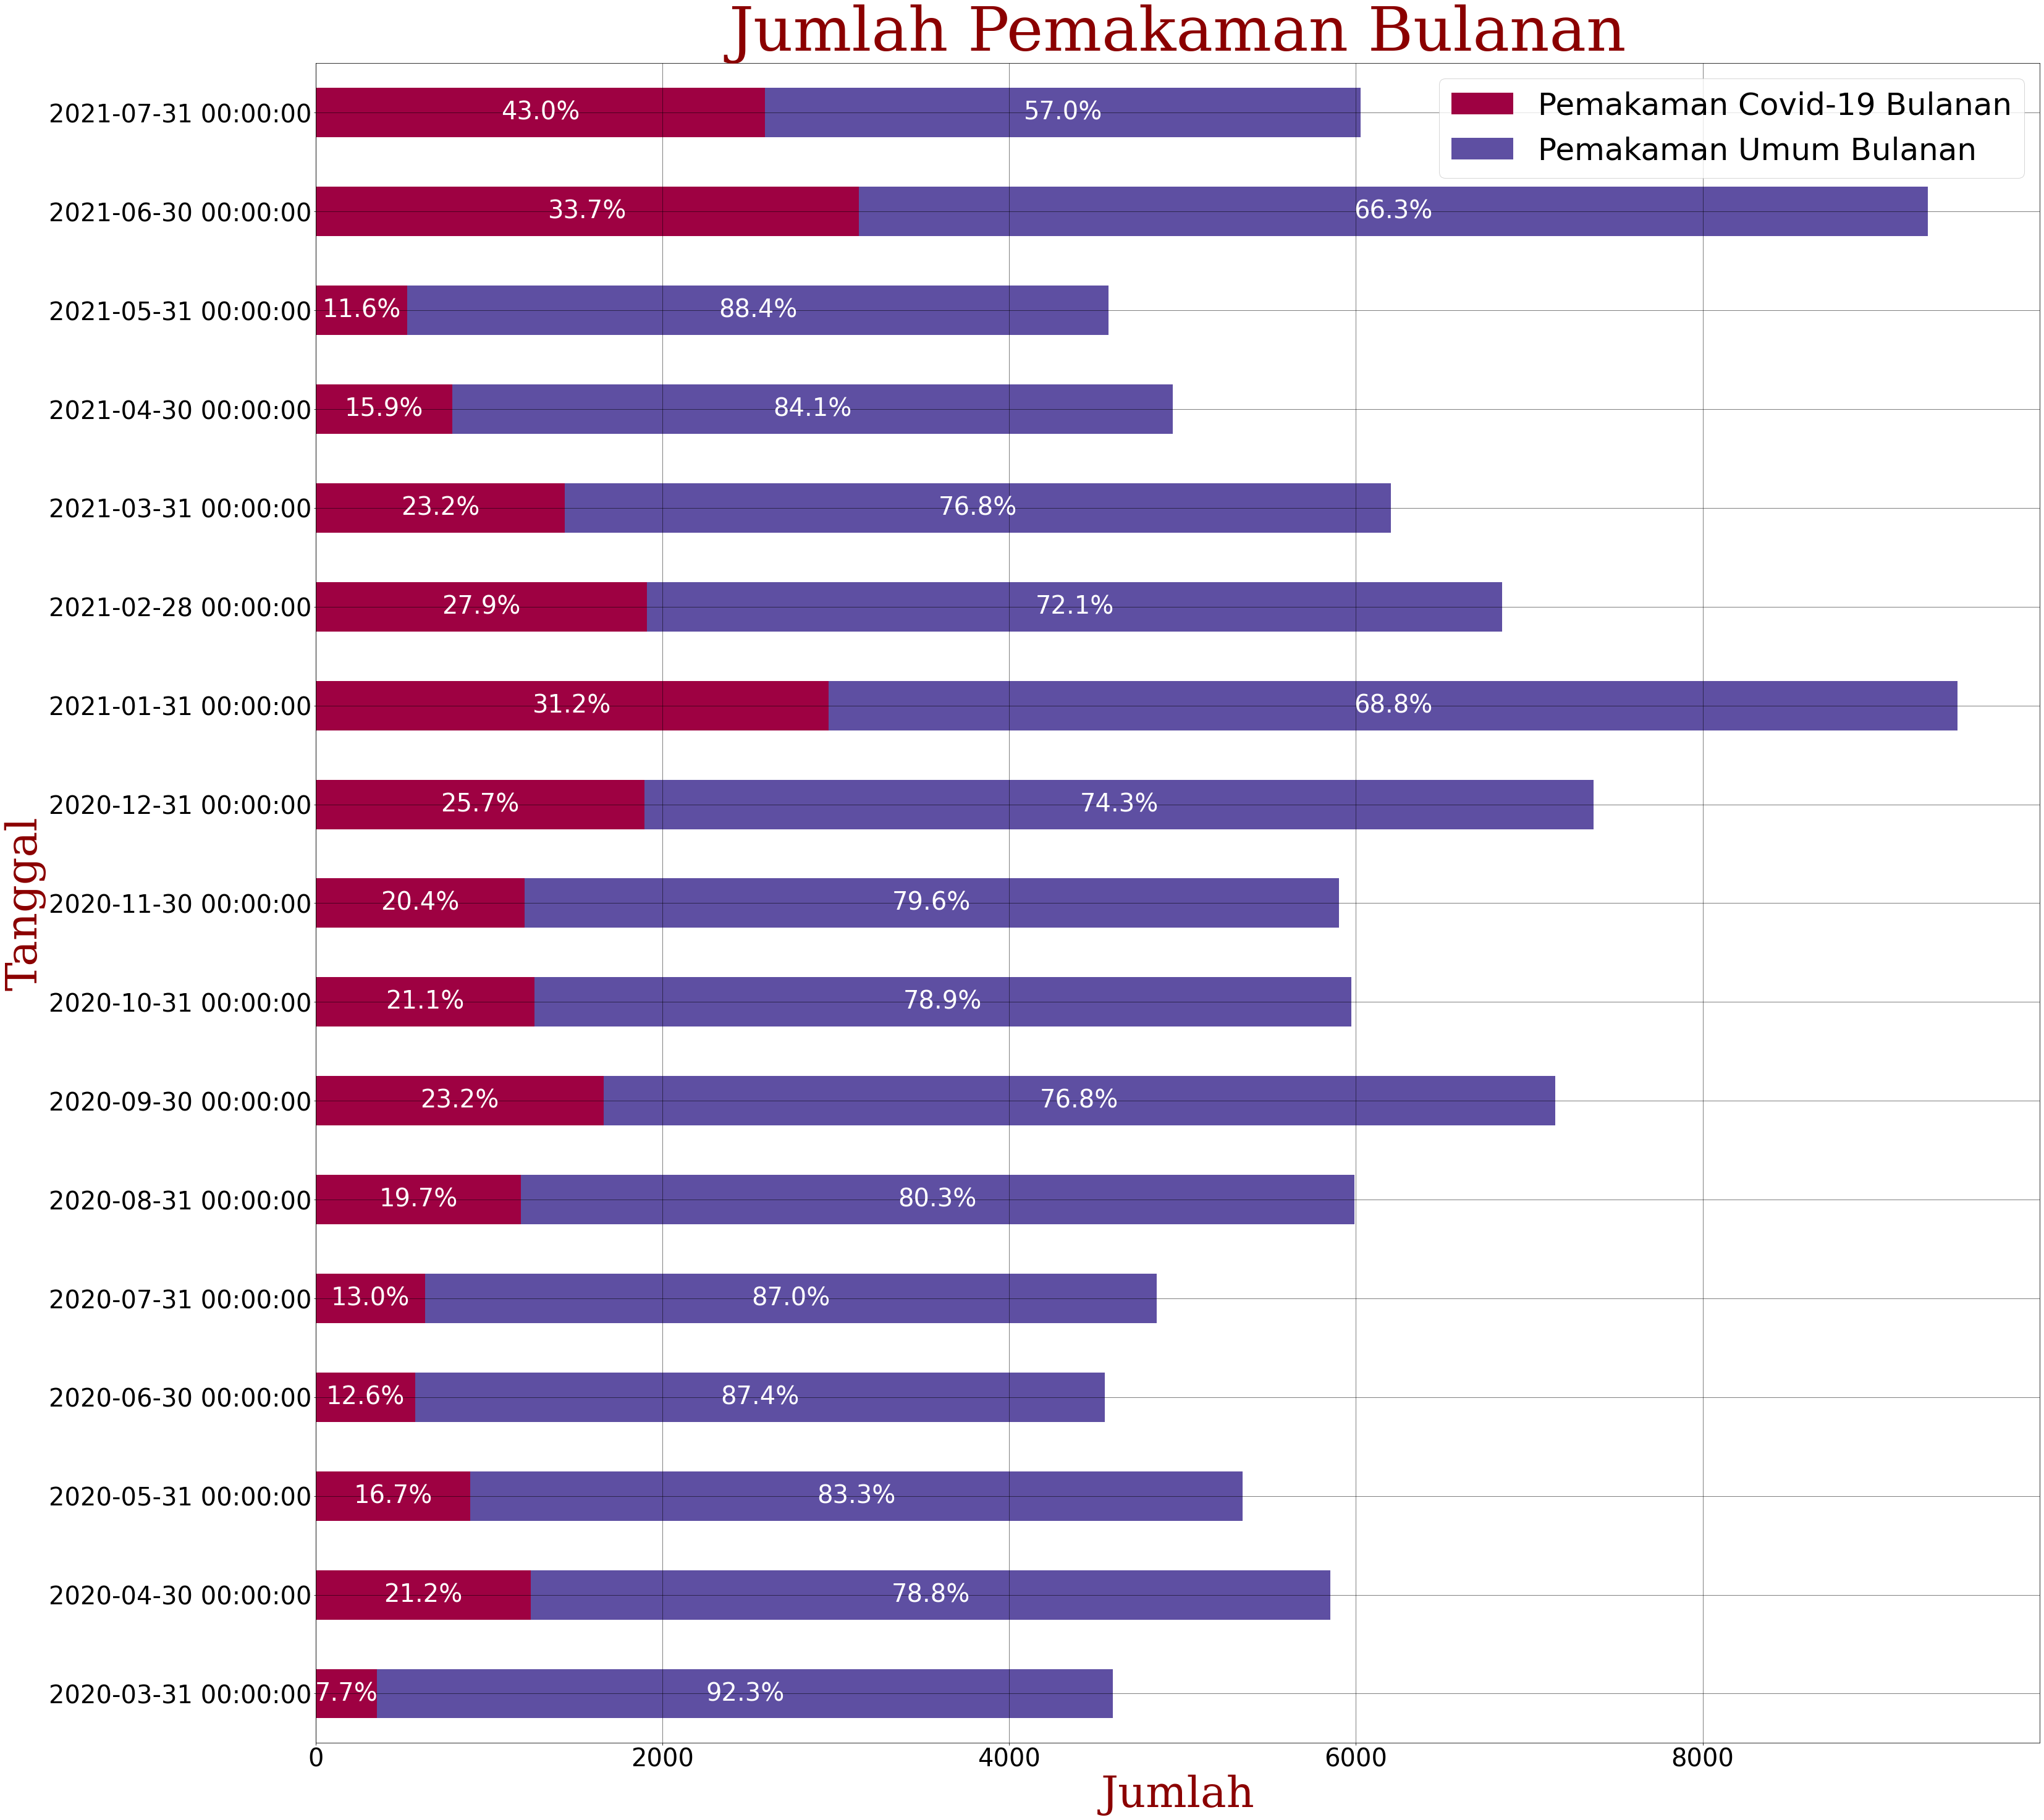

In [267]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

ax2 = df_perbulan.plot(
    x = 'Tanggal',
    kind = 'barh',
    stacked = True,
    mark_right = True,
    figsize=(50,50),
    fontsize=40,
    colormap='Spectral')
ax2.grid(linewidth=0.5,color='black',b=True)
ax2.legend(prop={'size': 50})
plt.title('Jumlah Pemakaman Bulanan',fontsize=100,fontdict=font)
plt.ylabel('Tanggal',size = 70,fontdict=font)
plt.xlabel('Jumlah',size = 70,fontdict=font)

df_total = df_perbulan['Pemakaman Covid-19 Bulanan'] + df_perbulan["Pemakaman Umum Bulanan"]
df_rel = df_perbulan[df_perbulan.columns[:2]].div(df_total, 0) * 100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_perbulan.iloc[:,:2].cumsum(1)[n], 
                                         df_perbulan[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center',fontsize = 40,color='white')

In [268]:
df

,Tanggal,Pemakaman_COVID19_Harian,Total_Pemakaman_COVID19,Pemakaman_Umum_Harian,Total_Pemakaman_Umum
Tanggal,,,,,
2020-03-01,2020-03-01,0,0,150,150
2020-03-02,2020-03-02,0,0,136,286
2020-03-03,2020-03-03,0,0,135,421
2020-03-04,2020-03-04,0,0,116,537
2020-03-05,2020-03-05,0,0,124,661
2020-03-06,2020-03-06,1,1,158,819
2020-03-07,2020-03-07,0,1,144,963
2020-03-08,2020-03-08,0,1,106,1069
2020-03-09,2020-03-09,0,1,145,1214


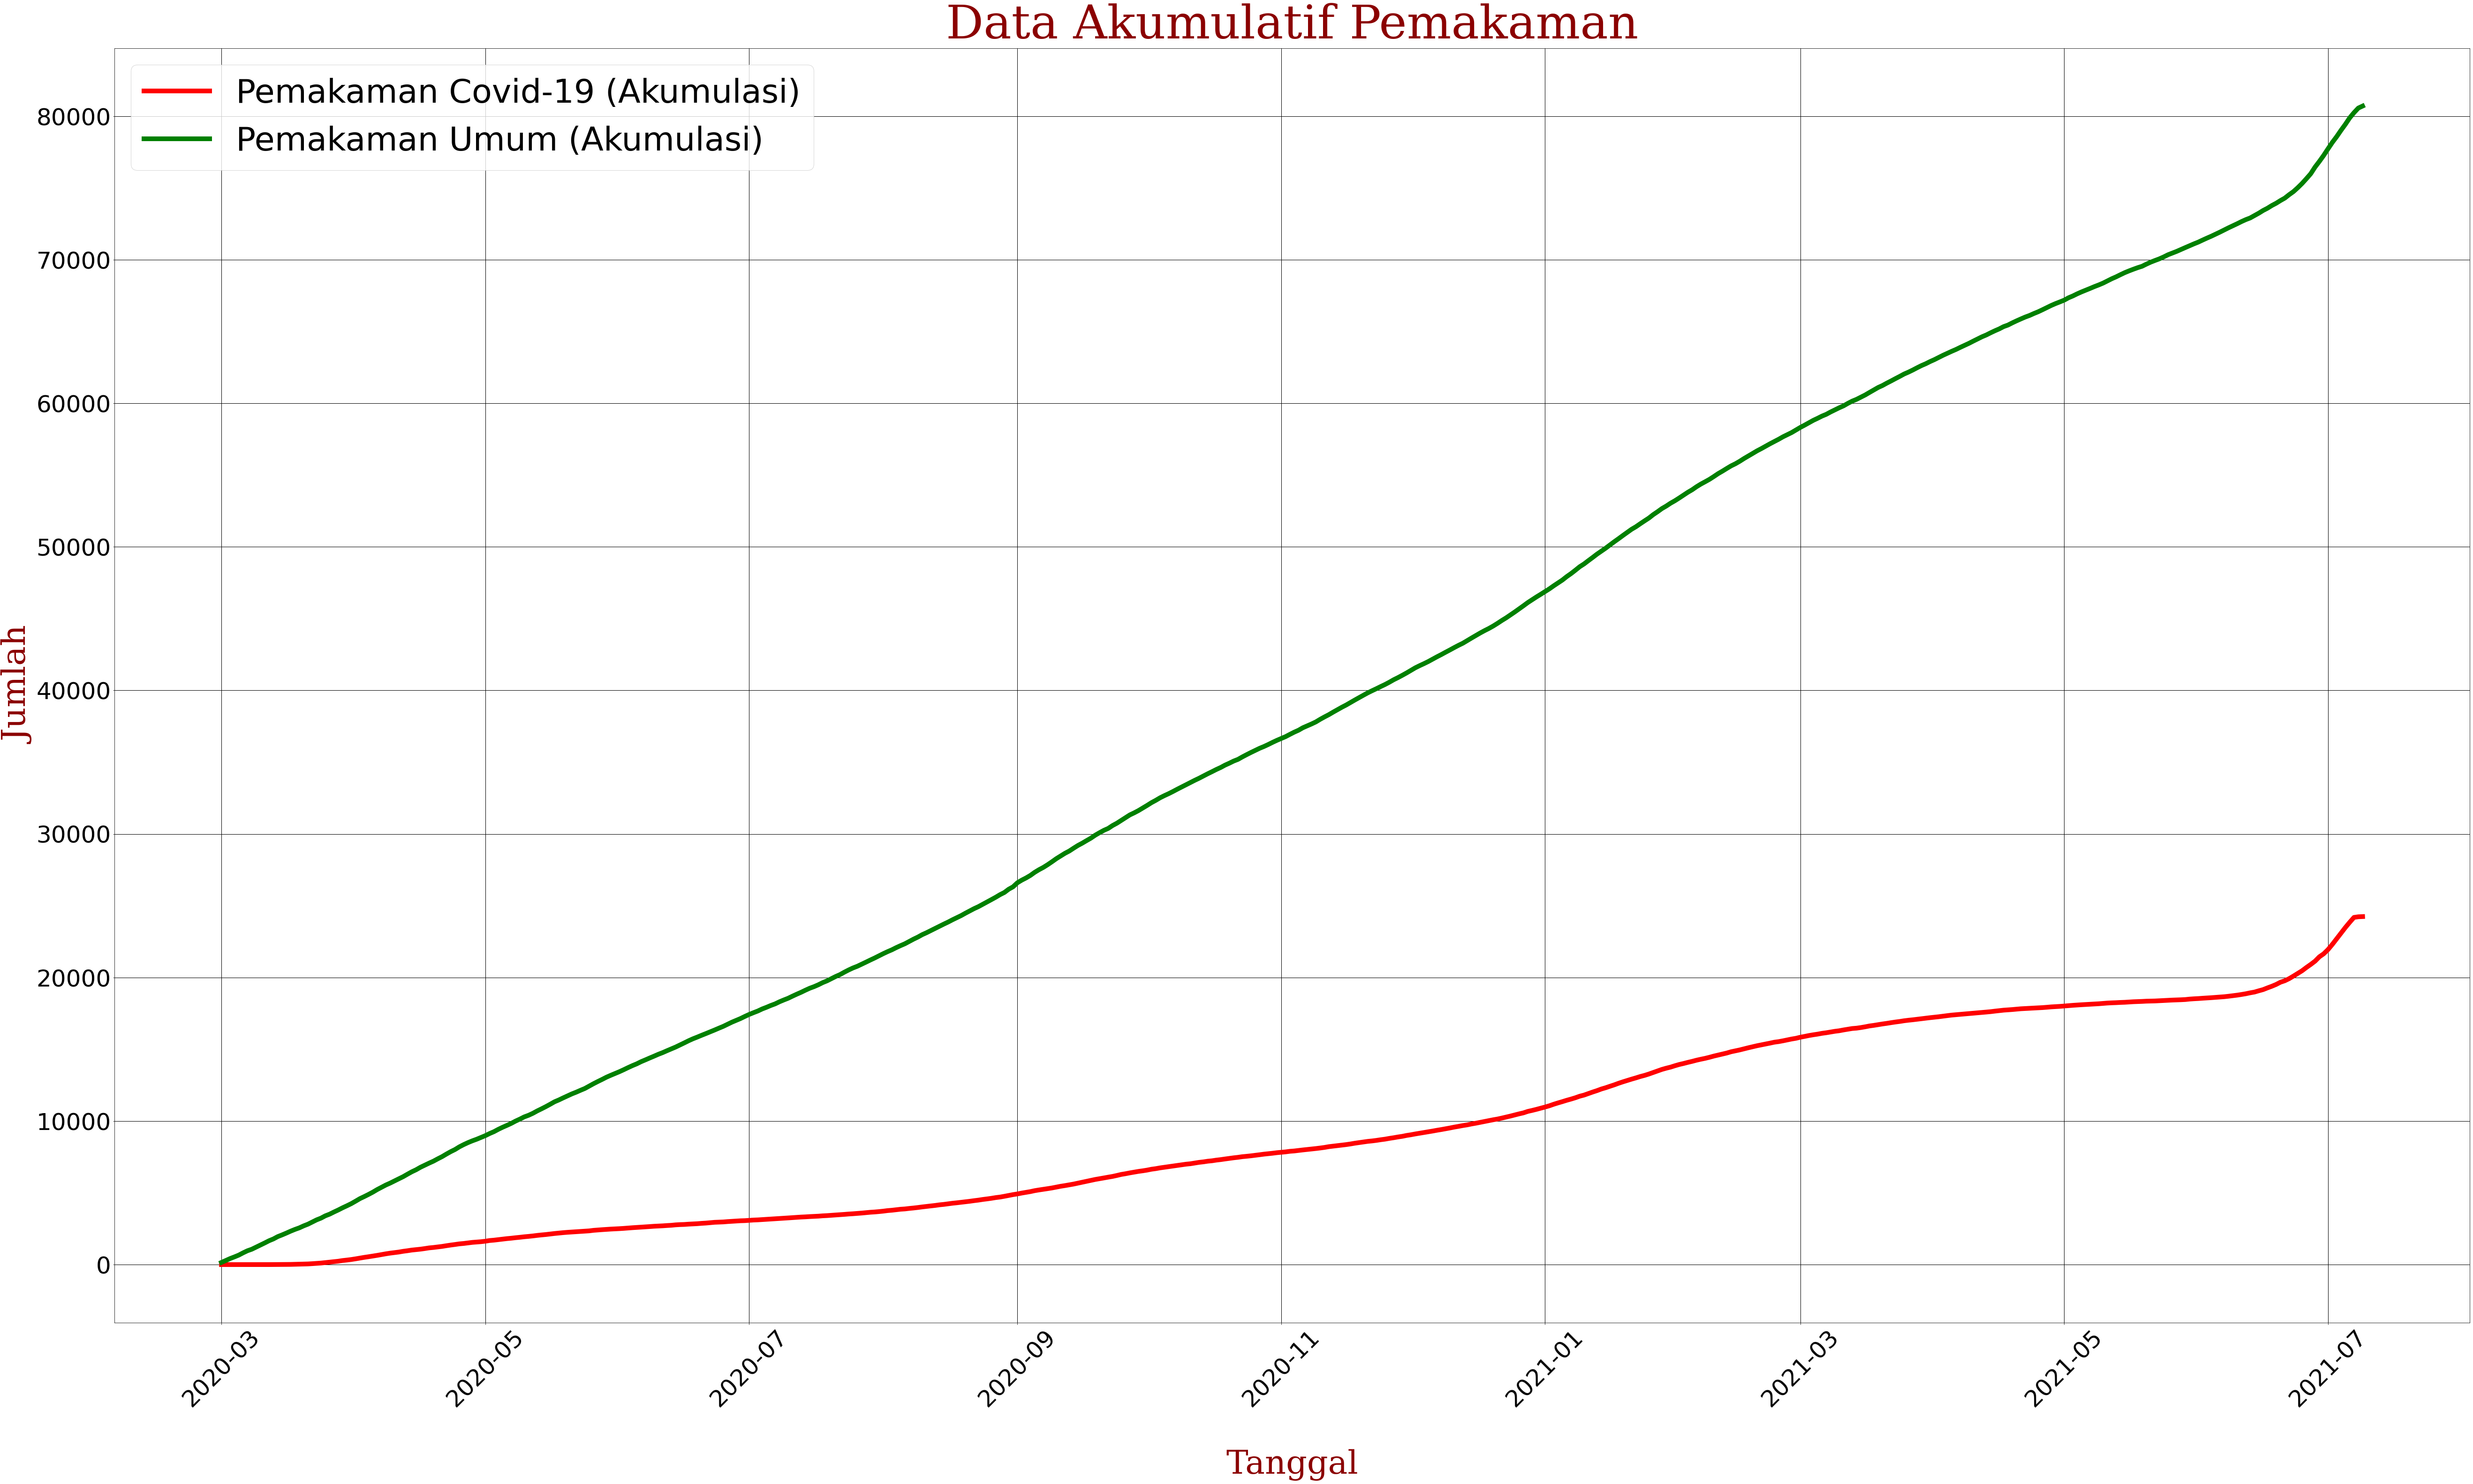

In [269]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(90,50))
ax.plot(df['Tanggal'],df['Total_Pemakaman_COVID19'],label = 'Pemakaman Covid-19 (Akumulasi)',marker='.',color='r',linewidth=10)
ax.plot(df['Tanggal'],df['Total_Pemakaman_Umum'],label = 'Pemakaman Umum (Akumulasi)',marker='.',color='g',linewidth=10)
plt.setp(ax.get_xticklabels(), rotation = 45,fontsize=50)
plt.setp(ax.get_yticklabels(),fontsize=50)
ax.yaxis.offsetText.set_fontsize(50)
ax.legend(prop={'size': 70})
plt.title('Data Akumulatif Pemakaman',fontsize=100,fontdict=font)
plt.xlabel('\nTanggal',size = 70,fontdict=font)
plt.ylabel('Jumlah',size = 70,fontdict=font)
ax.grid(linewidth=1,color='black',b=True)
ax.set_facecolor((1,1,1))